In [1]:

 





 


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px # Импортирует модуль express из библиотеки Plotly и создает псевдоним px для обращения к функциям модуля.
import tensorflow as tf
import sklearn
from sklearn import linear_model # Импортирует модуль linear_model из библиотеки scikit-learn (sklearn).
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor # Импортирует классы RandomForestRegressor и GradientBoostingRegressor из модуля ensemble библиотеки scikit-learn.
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor # Импортирует классы LinearRegression, LogisticRegression и SGDRegressor из модуля linear_model библиотеки scikit-learn.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error # Импортирует функции mean_squared_error, r2_score, mean_absolute_percentage_error и mean_absolute_error из модуля metrics библиотеки scikit-learn.
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score # Импортирует функции train_test_split, GridSearchCV, KFold и cross_val_score из модуля model_selection библиотеки scikit-learn.
from sklearn.neighbors import KNeighborsRegressor # Импортирует класс KNeighborsRegressor из модуля neighbors библиотеки scikit-learn.
from sklearn.neural_network import MLPRegressor # Импортирует класс MLPRegressor из модуля neural_network библиотеки scikit-learn.
from sklearn.pipeline import make_pipeline, Pipeline # Импортирует функции make_pipeline и Pipeline из модуля pipeline библиотеки scikit-learn.
from sklearn import preprocessing # Импортирует модуль preprocessing из библиотеки scikit-learn.
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler # Импортирует классы Normalizer, LabelEncoder, MinMaxScaler и Standard Scaler из модуля preprocessing библиотеки scikit-learn.
from sklearn.svm import SVR # Импортирует класс SVR из модуля svm библиотеки scikit-learn.
from sklearn.tree import DecisionTreeRegressor # Импортирует класс DecisionTreeRegressor из модуля tree библиотеки scikit-learn.
from tensorflow import keras as keras # Импортирует библиотеку Keras из TensorFlow и создает псевдоним keras для обращения к функциям библиотеки.
from tensorflow.keras import layers # Импортирует модуль layers из библиотеки Keras из TensorFlow для создания нейронных сетей.
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation # Импортирует классы Dense, Flatten, Dropout, BatchNormalization и Activation из модуля layers библиотеки Keras.
from pandas import read_excel, DataFrame, Series # Импортирует функции read_excel, DataFrame и Series из библиотеки Pandas.
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor # Импортирует классы KerasClassifier и KerasRegressor из модуля wrappers.scikit_learn библиотеки Keras.
from tensorflow.keras.models import Sequential # Импортирует класс Sequential из модуля models библиотеки Keras из TensorFlow для создания последовательных моделей нейронных сетей.
from numpy.random import seed # Импортирует функцию seed из библиотеки NumPy для установки начального значения генератора случайных чисел.
from scipy import stats # Импортирует модуль stats из библиотеки SciPy для статистического анализа данных.
import warnings # Импортирует модуль warnings для работы с предупреждениями в Python.
warnings.filterwarnings("ignore") # Игнорирует предупреждения, которые могут появиться в процессе выполнения кода.


In [2]:
#Загружаем очищенный датасет
df = pd.read_excel("Итог.xlsx")
df.shape # Выводим размерность.

(922, 14)

In [3]:
print(tf.__version__)

2.9.2


In [4]:
df = df.drop(['Unnamed: 0'],axis=1)

In [5]:
normalizer = Normalizer()
res = normalizer.fit_transform(df)
df_norm_n = pd.DataFrame(res, columns = df.columns)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(
    df_norm_n.loc[:, df_norm_n.columns != 'Модуль упругости при растяжении, ГПа'],
    df[['Модуль упругости при растяжении, ГПа']],
    test_size = 0.3,
    random_state = 42)
# Этот код создает объект класса `Normalizer` из модуля `preprocessing` библиотеки `scikit-learn`,
# который используется для нормализации данных. Затем, метод `fit_transform()` вызывается на объекте `normalizer`
# с передачей `df` в качестве аргумента. Этот метод преобразует `df` и возвращает его нормализованную версию, 
# которая сохраняется в `res`. Затем, `res` преобразуется в DataFrame и сохраняется в `df_norm_n`, а затем 
# выбираются данные для обучения и тестирования с помощью функции `train_test_split()` из модуля `model_selection` 
# библиотеки `scikit-learn`. В качестве аргументов этой функции передаются:
# df_norm_n.loc[:, df_norm_n.columns != 'Модуль упругости при растяжении, ГПа']`: данные, которые будут
# использоваться для обучения и тестирования модели, без столбца 'Модуль упругости при растяжении, ГПа'
# df[['Модуль упругости при растяжении, ГПа']]`: столбец 'Модуль упругости при растяжении, ГПа', который 
# является целевым признаком для обучения и тестирования модели
# test_size=0.3`: доля данных, которые будут использоваться для тестирования модели (30%)
# random_state=42`: случайное состояние генератора случайных чисел для воспроизводимости результатов.

In [6]:
# Функция для сравнения результатов предсказаний с моделью, выдающей среднее значение по тестовой выборке.
def mean_model(y_test_2):
    return [np.mean(y_test_2) for _ in range(len(y_test_2))]
y_2_pred_mean = mean_model(y_test_2)

# Этот код определяет функцию `mean_model`, которая принимает в качестве аргумента `y_test_2` 
# - тестовую выборку целевого признака, и возвращает список, состоящий из среднего значения целевого признака,
# повторенного столько раз, сколько элементов в `y_test_2`. Это означает, что каждый прогноз в `y_2_pred_mean` 
# будет равен среднему значению целевого признака в тренировочном наборе.
# Затем функция `mean_model` вызывается с `y_test_2` в качестве аргумента, и ее результат сохраняется в переменную
# `y_2_pred_mean`. Таким образом, `y_2_pred_mean` содержит список прогнозов, которые были сделаны путем 
# повторения среднего значения целевого признака для каждого элемента в тестовом наборе данных.

In [7]:
# Соотнесем данные на вход и выход для нейронной сети 
tv = df['Соотношение матрица-наполнитель']
tr_v = df.loc[:, df.columns != 'Соотношение матрица-наполнитель']
# Разбиваем выборки на обучающую и тестовую
x_train, x_test, y_train, y_test = train_test_split(tr_v, tv, test_size = 0.3, random_state = 14)

# Первая строка создает переменную `tv`, которая содержит столбец 'Соотношение матрица-наполнитель' 
# из исходного набора данных `df`. Во второй строке создается переменная `tr_v`, которая содержит
# все столбцы из `df`, кроме 'Соотношение матрица-наполнитель'. Третья строка использует функцию `train_test_split`
# из библиотеки `sklearn.model_selection` для разделения исходных данных на обучающую и тестовую выборки. 
# Аргументы функции - `tr_v` и `tv` - представляют соответственно независимые и зависимые переменные. `
# test_size` указывает на долю тестовых данных, которая в данном случае составляет 30%, а `random_state`
# устанавливает начальное значение генератора случайных чисел для воспроизводимости результатов. 
# Таким образом, `x_train`, `x_test`, `y_train` и `y_test` содержат обучающую и тестовую выборки 
# независимых и зависимых переменных соответственно, которые будут использоваться для обучения и тестирования модели.

In [8]:
# Нормализуем данные для нейронной сети keras.
x_train_n = tf.keras.layers.Normalization(axis =-1) # Cоздает объект `Normalization` из `tf.keras.layers`, 
# который позволяет нормализовать данные по выбранной оси (в данном случае -1, то есть по последней оси). 
x_train_n.adapt(np.array(x_train)) # Использует метод `adapt` объекта `x_train_n` для адаптации нормализации 
# к данным обучающей выборки `x_train`. В данном случае метод `adapt` вычисляет среднее и стандартное отклонение 
# по оси, указанной в `Normalization`, на основе данных обучающей выборки. 
# Это позволяет нормализовать данные тестовой выборки в будущем с использованием тех же значений 
# среднего и стандартного отклонения, что и для обучающей выборки.


In [9]:
def create_model(lyrs=[32], act='softmax', opt='SGD',dr=0.1):
    seed = 7
    np.random.seed(seed)
    tf.random.set_seed(seed)
    model=Sequential()
    model.add(Dense(lyrs[0], input_dim=x_train.shape[1], activation=act))
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i],activation=act))
    model.add(Dropout(dr))
    model.add(Dense(3, activation='tanh'))
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model
# Эта функция создает нейронную сеть в Keras/TensorFlow. 

# Аргументы функции:
# - `lyrs=[32]`: список, содержащий количество нейронов в каждом слое нейронной сети. 
# Здесь используется список с одним элементом по умолчанию, равным 32.
# - `act='softmax'`: активационная функция для всех слоев, кроме последнего. Здесь используется функция `softmax` по умолчанию.
# - `opt='SGD'`: оптимизатор, используемый при обучении нейронной сети. 
# Здесь используется стохастический градиентный спуск (SGD) по умолчанию.
# - `dr=0.1`: коэффициент Dropout для регуляризации нейронной сети. Значение по умолчанию равно 0.1.
# Внутри функции:
# - Создается объект модели `Sequential()`.
# - Добавляется полносвязный слой с указанным количеством нейронов `lyrs[0]` и функцией активации `act` для входного слоя `input_dim=x_train.shape[1]`.
# - Добавляются скрытые слои полносвязной нейронной сети с количеством нейронов, заданным в списке `lyrs`, и функцией активации `act`.
# - Добавляется слой Dropout с коэффициентом `dr`.
# - Добавляется выходной слой с 3 нейронами и функцией активации `tanh`.
# - Компилируется модель с функцией потерь `binary_crossentropy`, оптимизатором `opt` и метрикой `accuracy`.
# - Модель возвращается в качестве результата работы функции.

In [10]:
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=4, verbose=0)
layers = [[8],[16, 4],[32, 8, 3],[12, 6, 3], [64, 64, 3], [128, 64, 16, 3]]
param_grid = dict(lyrs=layers)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(x_train, y_train)
# Этот код выполняет настройку гиперпараметров нейронной сети с помощью поиска по сетке с использованием кросс-валидации.
# Вначале создается модель KerasClassifier с помощью функции `create_model()`, которая определяет 
# последовательную нейронную сеть с переменным количеством скрытых слоев, функций активации, оптимизатора и dropout-рейта.
# Затем задается сетка гиперпараметров с различными комбинациями скрытых слоев. Функция `GridSearchCV` используется 
# для выполнения 10-кратной кросс-валидации на обучающих данных, чтобы найти лучшую комбинацию гиперпараметров, 
# которая максимизирует точность модели.
# Результаты поиска по сетке хранятся в переменной `grid_result`.

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] END ...........................................lyrs=[8]; total time=   4.6s
[CV] END ...........................................lyrs=[8]; total time=   4.1s
[CV] END ...........................................lyrs=[8]; total time=   4.1s
[CV] END ...........................................lyrs=[8]; total time=   4.0s
[CV] END ...........................................lyrs=[8]; total time=   4.0s
[CV] END ...........................................lyrs=[8]; total time=   4.3s
[CV] END ...........................................lyrs=[8]; total time=   4.3s
[CV] END ...........................................lyrs=[8]; total time=   4.2s
[CV] END ...........................................lyrs=[8]; total time=   4.4s
[CV] END ...........................................lyrs=[8]; total time=   4.3s
[CV] END .......................................lyrs=[16, 4]; total time=   4.1s
[CV] END .......................................

In [11]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
 print("%f (%f) with: %r" % (mean, stdev, param))
# Этот код выводит результаты подбора гиперпараметров модели. Сначала выводится лучший полученный результат 
# и соответствующие гиперпараметры. Затем для каждого набора гиперпараметров, который был протестирован, 
# выводится среднее значение метрики качества (mean_test_score), стандартное отклонение (std_test_score) 
# и набор параметров (params).

Best: 0.004639 using {'lyrs': [128, 64, 16, 3]}
0.001538 (0.004615) with: {'lyrs': [8]}
0.001538 (0.004615) with: {'lyrs': [16, 4]}
0.001538 (0.004615) with: {'lyrs': [32, 8, 3]}
0.001538 (0.004615) with: {'lyrs': [12, 6, 3]}
0.001538 (0.004615) with: {'lyrs': [64, 64, 3]}
0.004639 (0.009877) with: {'lyrs': [128, 64, 16, 3]}


In [12]:
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=4, verbose=0)
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(act=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=10)
grid_result = grid.fit(x_train, y_train)
# Создание объекта model класса KerasClassifier с параметрами: build_fn: функция, создающая модель epochs:
# количество эпох обучения, batch_size: размер пакета данных для обучения, verbose: уровень логирования процесса обучения
# Определение списка возможных функций активации activation.
# Создание словаря param_grid, в котором ключ 'act' соответствует параметру функции активации модели.
# Создание объекта grid класса GridSearchCV с параметрами:
# estimator: модель, которую необходимо оптимизировать
# param_grid: набор параметров модели, которые необходимо оптимизировать
# n_jobs: количество потоков для выполнения задачи
# cv: количество блоков кросс-валидации
# Запуск оптимизации модели с помощью метода fit объекта grid на тренировочных данных x_train и y_train.

In [13]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
 print("%f (%f) with: %r" % (mean, stdev, param))
# Вывод строки в консоль с использованием форматирования для отображения значения наилучшего результата (best_score_)
# и соответствующего ему значения параметра функции активации (best_params_), полученных после оптимизации модели
# с помощью GridSearchCV.
# Присваивание переменной means массива средних значений оценок (mean_test_score) из объекта cv_results_.
# Присваивание переменной stds массива стандартных отклонений оценок (std_test_score) из объекта cv_results_.
# Присваивание переменной params массива словарей параметров модели (params) из объекта cv_results_.
# Итерация по массивам means, stds и params с помощью zip и вывод строк в консоль для каждой комбинации параметров, 
# включающих среднее значение оценки, стандартное отклонение и набор параметров.

Best: 0.001538 using {'act': 'softmax'}
0.001538 (0.004615) with: {'act': 'softmax'}
0.001538 (0.004615) with: {'act': 'softplus'}
0.001538 (0.004615) with: {'act': 'softsign'}
0.001538 (0.004615) with: {'act': 'relu'}
0.001538 (0.004615) with: {'act': 'tanh'}
0.001538 (0.004615) with: {'act': 'sigmoid'}
0.001538 (0.004615) with: {'act': 'hard_sigmoid'}
0.001538 (0.004615) with: {'act': 'linear'}


In [14]:
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=4, verbose=0)

drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
param_grid = dict(dr=drops)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(x_train, y_train)
# Создание объекта model класса KerasClassifier с параметрами:
# build_fn: функция, создающая модель
# epochs: количество эпох обучения
# batch_size: размер пакета данных для обучения
# verbose: уровень логирования процесса обучения
# Определение списка возможных значений для параметра dr (коэффициент dropout) - drops.
# Создание словаря param_grid, в котором ключ 'dr' соответствует параметру dropout модели.
# Создание объекта grid класса GridSearchCV с параметрами:
# estimator: модель, которую необходимо оптимизировать
# param_grid: набор параметров модели, которые необходимо оптимизировать
# cv: количество блоков кросс-валидации
# verbose: уровень логирования процесса оптимизации модели
# Запуск оптимизации модели с помощью метода fit объекта grid на тренировочных данных x_train и y_train.

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV] END .............................................dr=0.0; total time=   4.0s
[CV] END .............................................dr=0.0; total time=   3.9s
[CV] END .............................................dr=0.0; total time=   3.9s
[CV] END .............................................dr=0.0; total time=   4.0s
[CV] END .............................................dr=0.0; total time=   3.9s
[CV] END .............................................dr=0.0; total time=   4.2s
[CV] END .............................................dr=0.0; total time=   4.2s
[CV] END .............................................dr=0.0; total time=   4.3s
[CV] END .............................................dr=0.0; total time=   6.5s
[CV] END .............................................dr=0.0; total time=   5.5s
[CV] END ............................................dr=0.01; total time=   4.7s
[CV] END .......................................

In [15]:
# результаты
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# Вывод строки в консоль с использованием форматирования для отображения значения наилучшего результата 
# (best_score_) и соответствующего ему значения параметра dropout (best_params_), полученных после оптимизации модели
# с помощью GridSearchCV.
# Присваивание переменной means массива средних значений оценок (mean_test_score) из объекта cv_results_.
# Присваивание переменной stds массива стандартных отклонений оценок (std_test_score) из объекта cv_results_.
# Присваивание переменной params массива словарей параметров модели (params) из объекта cv_results_.
# Итерация по массивам means, stds и params с помощью zip и вывод строк в консоль для каждой комбинации параметров, 
# включающих среднее значение оценки, стандартное отклонение и набор параметров.

Best: 0.001538 using {'dr': 0.0}
0.001538 (0.004615) with: {'dr': 0.0}
0.001538 (0.004615) with: {'dr': 0.01}
0.001538 (0.004615) with: {'dr': 0.05}
0.001538 (0.004615) with: {'dr': 0.1}
0.001538 (0.004615) with: {'dr': 0.2}
0.001538 (0.004615) with: {'dr': 0.3}
0.001538 (0.004615) with: {'dr': 0.5}


In [16]:
# Построение окончательной модели
model = create_model(lyrs=[128,64,32, 3], dr=0.05)
print(model.summary())
# Создание модели с помощью функции create_model и передача ей следующих аргументов:
# lyrs: список, содержащий количество нейронов в каждом из четырех слоев нейронной сети (128, 64, 32, 3)
# dr: коэффициент dropout, равный 0.05.
# Вывод краткой сводки модели в консоль с помощью метода summary().

Model: "sequential_133"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_369 (Dense)           (None, 128)               1664      
                                                                 
 dense_370 (Dense)           (None, 64)                8256      
                                                                 
 dense_371 (Dense)           (None, 32)                2080      
                                                                 
 dense_372 (Dense)           (None, 3)                 99        
                                                                 
 dropout_133 (Dropout)       (None, 3)                 0         
                                                                 
 dense_373 (Dense)           (None, 3)                 12        
                                                                 
Total params: 12,111
Trainable params: 12,111
Non-tr

In [17]:
# обучаем нейросеть, 70/30 CV
model_hist = model.fit(x_train,
 y_train,
 epochs = 100,
 verbose = 1,
 validation_split = 0.3)

# Обучение модели с помощью метода fit с передачей следующих аргументов:
# x_train: тренировочные данные для обучения модели.
# y_train: тренировочные метки классов для обучения модели.
# epochs: количество эпох обучения (100).
# verbose: уровень логирования процесса обучения.
# validation_split: доля данных для валидации (30%).

Epoch 1/100
15/15 [==============================] - 0s 9ms/step - loss: 45.1804 - accuracy: 0.0000e+00 - val_loss: 44.5008 - val_accuracy: 0.0000e+00
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 45.2295 - accuracy: 0.0000e+00 - val_loss: 44.5008 - val_accuracy: 0.0000e+00
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 41.0796 - accuracy: 0.0000e+00 - val_loss: 25.8885 - val_accuracy: 0.0000e+00
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 26.3566 - accuracy: 0.0000e+00 - val_loss: 25.4854 - val_accuracy: 0.0000e+00
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 25.9596 - accuracy: 0.0000e+00 - val_loss: 25.0811 - val_accuracy: 0.0000e+00
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 25.5097 - accuracy: 0.0000e+00 - val_loss: 24.6641 - val_accuracy: 0.0000e+00
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 24.5169 - accuracy: 0

15/15 [==============================] - 0s 3ms/step - loss: -4.4601 - accuracy: 0.0000e+00 - val_loss: -4.3295 - val_accuracy: 0.0000e+00
Epoch 56/100
15/15 [==============================] - 0s 1ms/step - loss: -4.2354 - accuracy: 0.0000e+00 - val_loss: -4.3295 - val_accuracy: 0.0000e+00
Epoch 57/100
15/15 [==============================] - 0s 3ms/step - loss: -4.3142 - accuracy: 0.0000e+00 - val_loss: -4.3295 - val_accuracy: 0.0000e+00
Epoch 58/100
15/15 [==============================] - 0s 3ms/step - loss: -4.3997 - accuracy: 0.0000e+00 - val_loss: -4.3295 - val_accuracy: 0.0000e+00
Epoch 59/100
15/15 [==============================] - 0s 3ms/step - loss: -4.3683 - accuracy: 0.0000e+00 - val_loss: -4.3295 - val_accuracy: 0.0000e+00
Epoch 60/100
15/15 [==============================] - 0s 2ms/step - loss: -4.4317 - accuracy: 0.0000e+00 - val_loss: -4.3295 - val_accuracy: 0.0000e+00
Epoch 61/100
15/15 [==============================] - 0s 3ms/step - loss: -4.3668 - accuracy: 0.0000e

In [18]:
# оценим модель
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# Вычисление значений метрик модели на тестовых данных с помощью метода evaluate с передачей следующих аргументов:
# x_test: тестовые данные для оценки модели.
# y_test: тестовые метки классов для оценки модели.
# Вывод строки в консоль с использованием форматирования для отображения названия метрики второго элемента массива
# model.metrics_names (в данном случае это accuracy) и соответствующего ей значения метрики, умноженной на 100 (scores[1]*100).

9/9 [==============================] - 0s 1ms/step - loss: -4.3965 - accuracy: 0.0000e+00

accuracy: 0.00%


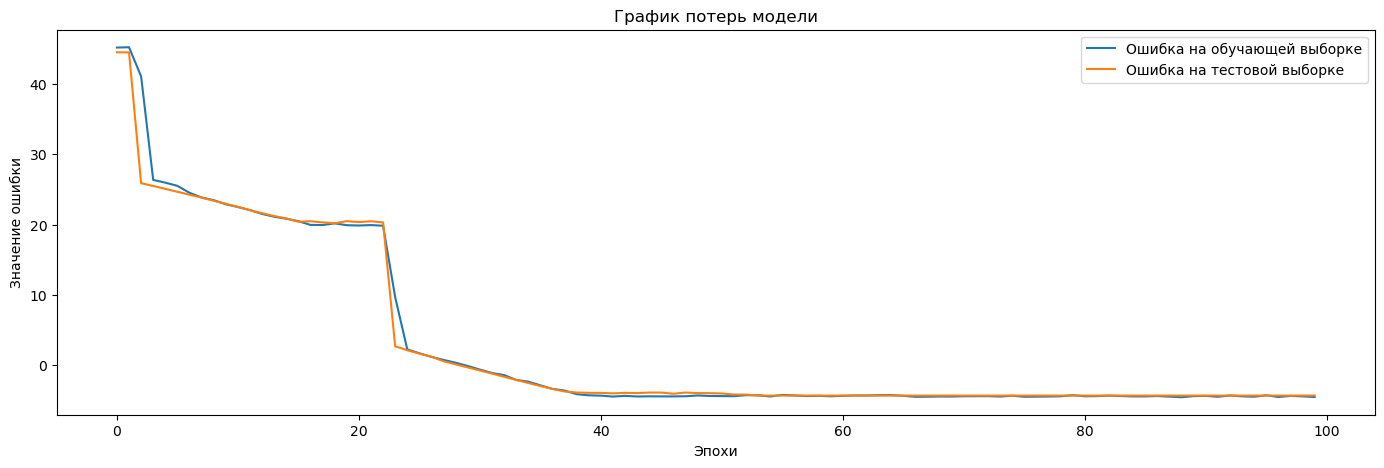

In [19]:
# Посмотрим на график потерь данных при обучении нейронной сети на тренировочных и тестовой выборкых
def model_chart(model_hist):
 plt.figure(figsize = (17,5))
 plt.plot(model_hist.history['loss'],
 label = 'ошибка на обучающей выборке')
 plt.plot(model_hist.history['val_loss'],
 label = 'ошибка на тестовой выборке')
 plt.title('График потерь модели')
 plt.ylabel('Значение ошибки')
 plt.xlabel('Эпохи')
 plt.legend(['Oшибка на обучающей выборке', 'Ошибка на тестовой выборке'], loc='best')
 plt.show()
model_chart(model_hist)
# Определение функции model_chart, которая принимает объект model_hist и строит график изменения ошибки 
# на обучающей и тестовой выборках в зависимости от количества эпох.
# Создание графика с помощью функции figure() из библиотеки Matplotlib с размером (17,5).
# Отрисовка двух линий на графике: одна показывает изменение ошибки на обучающей выборке (model_hist.history['loss']),
# другая - на тестовой выборке (model_hist.history['val_loss']).
# Задание заголовка и названий осей графика.
# Отображение легенды в соответствующем месте графика.
# Вывод графика в консоль с помощью функции show() из библиотеки Matplotlib.
# Вызов функции model_chart с аргументом model_hist.

9/9 [==============================] - 0s 3ms/step


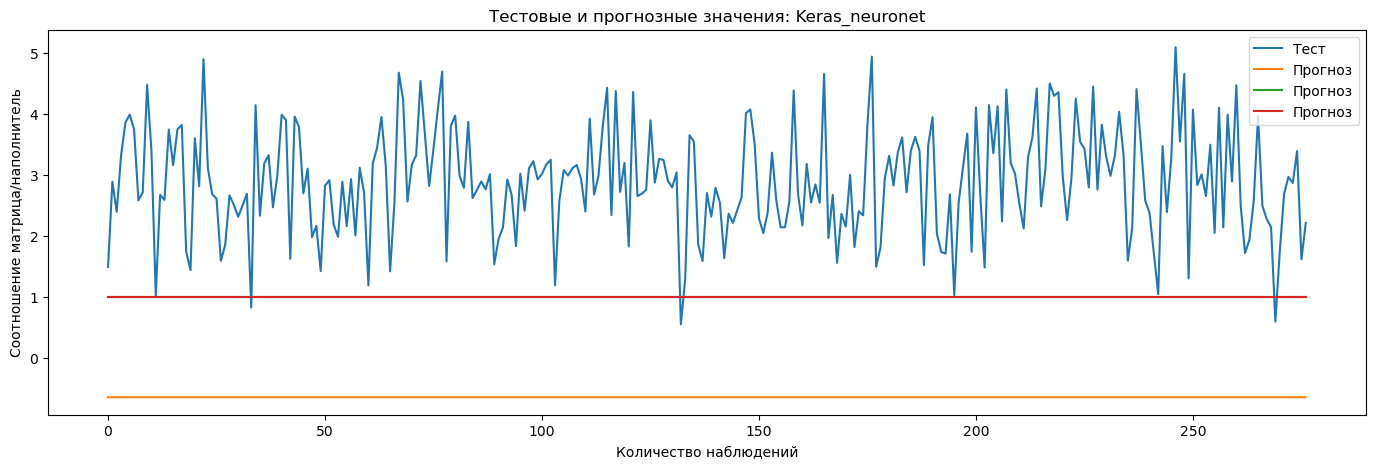

In [20]:
def actual_and_predict(orig, predict, var, model_name):
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predict(y_test.values, model.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'Keras_neuronet')

# Определение функции actual_and_predict, которая принимает на вход 4 параметра:
# orig: исходные значения тестовой выборки
# predict: прогнозные значения модели
# var: название переменной, которую предсказывает модель
# model_name: название модели
# Функция строит график с исходными и прогнозными значениями для переменной var, а также выводит название модели model_name.
# Создание графика с помощью функции figure() из библиотеки Matplotlib с размером (17,5).
# Задание заголовка графика с названием модели.
# Отрисовка двух линий на графике: одна показывает исходные значения тестовой выборки (orig), 
# другая - прогнозные значения модели (predict).
# Отображение легенды в соответствующем месте графика.
# Задание названий осей графика.
# Вывод графика в консоль с помощью функции show() из библиотеки Matplotlib.
# Вызов функции actual_and_predict с аргументами y_test.values, model.predict(x_test.values),
# 'Cоотношение матрица/наполнитель', 'Keras_neuronet'.

In [21]:
# Сконфигурируем другую модель, зададим слои
from tensorflow.keras import layers
model1 = tf.keras.Sequential([x_train_n, layers.Dense(128, activation='relu'), 
                                                 layers.Dense(128, activation='relu'),
                                                 layers.Dense(128, activation='relu'),
                                                 layers.Dense(64, activation='relu'),
                                                 layers.Dense(64, activation='relu'),
                                                 layers.Dense(32, activation='relu'),
                                               
                                                 layers.Dense(1)
                            ])

model1.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()]) 

model1.summary()
# Данный код определяет модель нейронной сети с использованием Keras Sequential API. Архитектура модели состоит из 
# нескольких слоев, каждый из которых задан с помощью модуля layers Keras. Первый слой - это слой Dense с 128 нейронами
# и функцией активации ReLU, за которым следуют еще два слоя Dense с 128 нейронами и функцией активации ReLU каждый.
# Затем идут два слоя Dense с 64 и 32 нейронами соответственно, оба с функцией активации ReLU. Наконец, есть слой Dense 
# с одним выходным блоком.
# Модель компилируется с использованием оптимизатора Adam с коэффициентом обучения 0,001, а функция потерь устанавливается 
# как среднеквадратическая ошибка. Кроме того, модель оценивается с использованием метрики Root Mean Squared Error (RMSE).
# Метод summary используется для вывода архитектуры модели и количества обучаемых параметров.

Model: "sequential_134"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_374 (Dense)           (None, 128)               1664      
                                                                 
 dense_375 (Dense)           (None, 128)               16512     
                                                                 
 dense_376 (Dense)           (None, 128)               16512     
                                                                 
 dense_377 (Dense)           (None, 64)                8256      
                                                                 
 dense_378 (Dense)           (None, 64)                4160      
                                                    

In [22]:
# Обучим модель
model_hist1 = model1.fit(
 x_train,
 y_train,
 epochs = 100,
 verbose = 1,
 validation_split = 0.3)
# Этот код обучает модель model1 на обучающих данных x_train и y_train в течение 100 эпох, используя
# оптимизатор Adam с скоростью обучения (learning rate) 0.001. В процессе обучения выводится информация 
# о прогрессе в консоль с уровнем логирования verbose = 1. Валидационная выборка размером 30% от обучающей выборки 
# используется для проверки качества модели в процессе обучения. Результаты обучения сохраняются в переменную model_hist1.

Epoch 1/100
15/15 [==============================] - 0s 10ms/step - loss: 4.0970 - root_mean_squared_error: 2.0241 - val_loss: 1.8280 - val_root_mean_squared_error: 1.3520
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 1.3088 - root_mean_squared_error: 1.1440 - val_loss: 1.2777 - val_root_mean_squared_error: 1.1304
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 1.0033 - root_mean_squared_error: 1.0017 - val_loss: 1.2239 - val_root_mean_squared_error: 1.1063
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.9170 - root_mean_squared_error: 0.9576 - val_loss: 1.1901 - val_root_mean_squared_error: 1.0909
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.8715 - root_mean_squared_error: 0.9335 - val_loss: 1.1300 - val_root_mean_squared_error: 1.0630
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 0.8353 - root_mean_squared_error: 0.9139 - val_loss: 1.1594 - val_root_

Epoch 49/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0095 - root_mean_squared_error: 0.0972 - val_loss: 1.5130 - val_root_mean_squared_error: 1.2300
Epoch 50/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0093 - root_mean_squared_error: 0.0965 - val_loss: 1.5698 - val_root_mean_squared_error: 1.2529
Epoch 51/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0075 - root_mean_squared_error: 0.0868 - val_loss: 1.5570 - val_root_mean_squared_error: 1.2478
Epoch 52/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0049 - root_mean_squared_error: 0.0701 - val_loss: 1.5782 - val_root_mean_squared_error: 1.2563
Epoch 53/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0077 - root_mean_squared_error: 0.0875 - val_loss: 1.5328 - val_root_mean_squared_error: 1.2380
Epoch 54/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0110 - root_mean_squared_error: 0.1050 - val_loss: 1.5434 - val_

15/15 [==============================] - 0s 2ms/step - loss: 0.0124 - root_mean_squared_error: 0.1115 - val_loss: 1.4999 - val_root_mean_squared_error: 1.2247
Epoch 97/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0075 - root_mean_squared_error: 0.0868 - val_loss: 1.5066 - val_root_mean_squared_error: 1.2274
Epoch 98/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0058 - root_mean_squared_error: 0.0760 - val_loss: 1.4971 - val_root_mean_squared_error: 1.2236
Epoch 99/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0111 - root_mean_squared_error: 0.1052 - val_loss: 1.4983 - val_root_mean_squared_error: 1.2240
Epoch 100/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0097 - root_mean_squared_error: 0.0983 - val_loss: 1.4722 - val_root_mean_squared_error: 1.2134


In [23]:
model1.evaluate(x_test, y_test)
# Этот код оценивает производительность model1 на тестовом наборе данных x_test и y_test 
# и возвращает значения функции потерь и метрики среднеквадратического корня.

9/9 [==============================] - 0s 909us/step - loss: 1.1984 - root_mean_squared_error: 1.0947


[1.1983680725097656, 1.0946999788284302]

In [24]:
# x_train= model1.shape(x_train_n)


In [25]:
y_pred_model = model1.predict(x_test)
print('Model Results:')
print('Model_MAE: ', round(mean_absolute_error(y_test, y_pred_model)))
print('Model_MAPE: {:.2f}'.format(mean_absolute_percentage_error(y_test, y_pred_model)))
print("Test score: {:.2f}".format(mean_squared_error(y_test, y_pred_model)))
# Этот код используется для оценки производительности модели model1 на тестовых данных. y_pred_model 
# содержит прогнозные значения, полученные моделью model1 для тестовых данных x_test. 
# Затем рассчитываются следующие метрики:
# средняя абсолютная ошибка (MAE) между прогнозными значениями y_pred_model и реальными значениями y_test;
# средняя абсолютная процентная ошибка (MAPE) между прогнозными значениями y_pred_model и реальными значениями y_test;
# средняя квадратичная ошибка (MSE) между прогнозными значениями y_pred_model и реальными значениями y_test.
# Затем эти метрики выводятся на экран для оценки производительности модели.

9/9 [==============================] - 0s 2ms/step
Model Results:
Model_MAE:  1
Model_MAPE: 0.36
Test score: 1.20


In [26]:
# Посмотрим на потери модели
model_hist1.history
# Cодержит историю обучения модели машинного обучения. В библиотеке Keras, эта переменная обычно возвращается методом fit(),
# когда модель обучается, и содержит информацию, такую как метрики потерь и точности на каждой эпохе обучения.
# Переменная model_hist1.history обычно является словарем, где ключи соответствуют метрикам, отслеживаемым во время обучения
# (например, 'loss', 'accuracy' и т.д.), а значения соответствуют списку значений метрики на каждой эпохе обучения. 
# Например, model_hist1.history['loss'] может вернуть список значений потерь модели на каждой эпохе обучения.
# Эта переменная может быть полезна для анализа того, насколько хорошо модель работает во время обучения, 
# выявления тенденций в метриках потерь и точности со временем, а также определения, переобучается или недообучается ли
# модель на тренировочных данных.

{'loss': [4.097025394439697,
  1.3087551593780518,
  1.0033372640609741,
  0.9169986248016357,
  0.871511697769165,
  0.8353015184402466,
  0.7909485101699829,
  0.7658815979957581,
  0.8044087290763855,
  0.6729697585105896,
  0.6625354290008545,
  0.6410343050956726,
  0.6125679016113281,
  0.5280584096908569,
  0.5262115001678467,
  0.4437999725341797,
  0.4286724328994751,
  0.3769891560077667,
  0.3595365285873413,
  0.2886124849319458,
  0.24227480590343475,
  0.20600120723247528,
  0.16268612444400787,
  0.139900803565979,
  0.13124717772006989,
  0.10252375900745392,
  0.08717844635248184,
  0.09402316063642502,
  0.08342866599559784,
  0.06613601744174957,
  0.07436300069093704,
  0.07033703476190567,
  0.03964961692690849,
  0.031818754971027374,
  0.019732125103473663,
  0.020809054374694824,
  0.017367307096719742,
  0.013911549933254719,
  0.008887204341590405,
  0.019445030018687248,
  0.013755928725004196,
  0.011857838369905949,
  0.013952597975730896,
  0.0150536326691

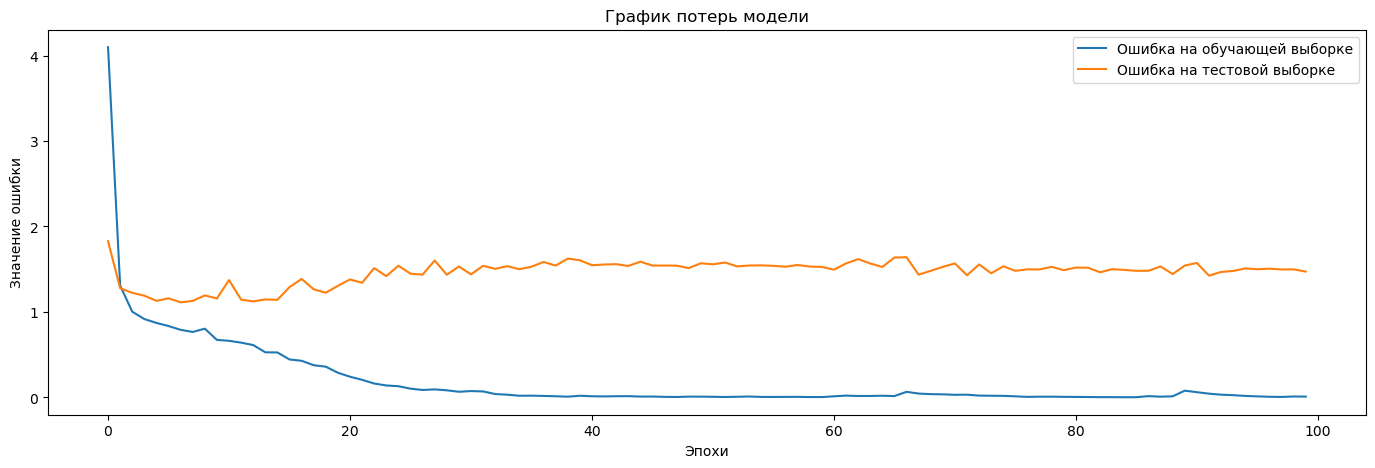

In [27]:
# Посмотрим на график потерь на тренировочной и тестовой выборках
def model_loss_plot(model_hist1):
 plt.figure(figsize = (17,5))
 plt.plot(model_hist1.history['loss'],
 label = 'ошибка на обучающей выборке')
 plt.plot(model_hist1.history['val_loss'],
 label = 'ошибка на тестовой выборке')
 plt.title('График потерь модели')
 plt.ylabel('Значение ошибки')
 plt.xlabel('Эпохи')
 plt.legend(['Oшибка на обучающей выборке', 'Ошибка на тестовой выборке'], loc='best')
 plt.show()
model_loss_plot(model_hist1)
# Код  визуализирует график потерь (ошибки) модели.
# def model_loss_plot(model_hist1): - объявление функции model_loss_plot, которая принимает один аргумент model_hist1.
# plt.figure(figsize = (17,5)) - создание фигуры графика с размером (17,5).
# plt.plot(model_hist1.history['loss'], label = 'ошибка на обучающей выборке') - построение графика ошибки
# на обучающей выборке для каждой эпохи обучения.
# plt.plot(model_hist1.history['val_loss'], label = 'ошибка на тестовой выборке') - построение графика ошибки 
# на тестовой выборке для каждой эпохи обучения.
# plt.title('График потерь модели') - задание заголовка графика.
# plt.ylabel('Значение ошибки') - задание подписи для оси y.
# plt.xlabel('Эпохи') - задание подписи для оси x.
# plt.legend(['Oшибка на обучающей выборке', 'Ошибка на тестовой выборке'], loc='best') - добавление легенды на график,
# указывающей, какие линии отображают ошибки на обучающей и тестовой выборке.
# plt.show() - отображение графика.
# model_loss_plot(model_hist1) - вызов функции model_loss_plot с аргументом model_hist1.

9/9 [==============================] - 0s 504us/step


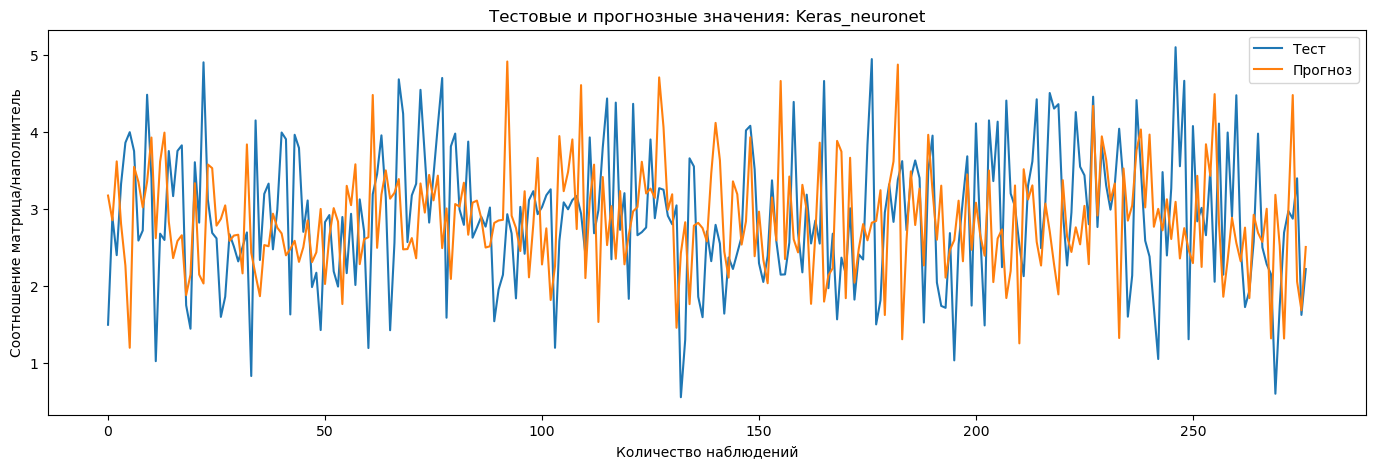

In [28]:
# Зададим функцию для визуализации факт/прогноз для результатов моделей
# Посмотрим на график результата работы модели
def actual_and_predicted_plot(orig, predict, var, model_name): 
 plt.figure(figsize=(17,5))
 plt.title(f'Тестовые и прогнозные значения: {model_name}')
 plt.plot(orig, label = 'Тест')
 plt.plot(predict, label = 'Прогноз')
 plt.legend(loc = 'best')
 plt.ylabel(var)
 plt.xlabel('Количество наблюдений')
 plt.show()
actual_and_predicted_plot(y_test.values, model1.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'Keras_neuronet')

# Код написан на языке Python и визуализирует график сравнения фактических и прогнозируемых значений целевой переменной
# модели машинного обучения.
# def actual_and_predicted_plot(orig, predict, var, model_name): - объявление функции actual_and_predicted_plot, 
# которая принимает четыре аргумента: orig - массив фактических значений целевой переменной, predict - массив прогнозируемых
# значений целевой переменной, var - строковая переменная, указывающая, что представляют собой значения целевой переменной,
# и model_name - строковая переменная, указывающая название модели.
# plt.figure(figsize=(17,5)) - создание фигуры графика с размером (17,5).
# plt.title(f'Тестовые и прогнозные значения: {model_name}') - задание заголовка графика с названием модели.
# plt.plot(orig, label = 'Тест') - построение графика фактических значений целевой переменной orig.
# plt.plot(predict, label = 'Прогноз') - построение графика прогнозируемых значений целевой переменной predict.
# plt.legend(loc = 'best') - добавление легенды на график, указывающей, какие линии отображают фактические и 
# прогнозируемые значения целевой переменной.
# plt.ylabel(var) - задание подписи для оси y с названием целевой переменной.
# plt.xlabel('Количество наблюдений') - задание подписи для оси x, указывающей количество наблюдений.
# plt.show() - отображение графика.
a# ctual_and_predicted_plot(y_test.values, model1.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'Keras_neuronet')
# - вызов функции actual_and_predicted_plot с аргументами: массивом фактических значений y_test.values, массивом
# прогнозируемых значений model1.predict(x_test.values), строковой переменной 'Cоотношение матрица/наполнитель' и
# строковой переменной 'Keras_neuronet', которая указывает на название модели.

In [29]:
# оценка модели MSE
model1.evaluate(x_test, y_test, verbose = 1)
# Данный код вызывает метод evaluate() на объекте модели model1. Метод evaluate() используется для оценки
# качества модели на тестовых данных и возвращает значение метрики, указанной при компиляции модели. 
# x_test: тестовые данные, на которых производится оценка.
# y_test: фактические значения целевой переменной для тестовых данных.
# verbose: опциональный параметр, который указывает, какую информацию нужно выводить при оценке модели.
# Значение 1 означает выводить информацию о прогрессе оценки, 0 - не выводить.

9/9 [==============================] - 0s 895us/step - loss: 1.1984 - root_mean_squared_error: 1.0947


[1.1983680725097656, 1.0946999788284302]

9/9 [==============================] - 0s 416us/step


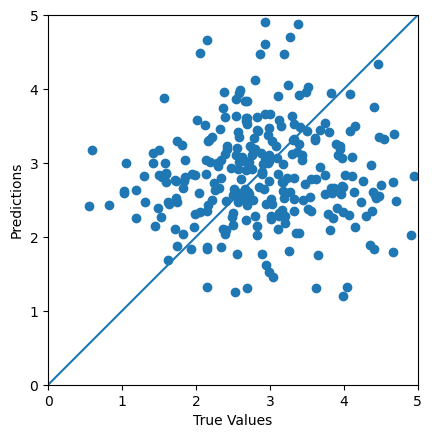

In [30]:
test_predictions = model1.predict(x_test).flatten()
a = plt.axes(aspect = 'equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# Данный код строит scatter plot (график рассеяния) между фактическими значениями y_test и прогнозируемыми значениями
# test_predictions для модели model1. Каждая точка на графике соответствует одному наблюдению. Фактические значения
# находятся на оси x (True Values), а прогнозируемые находятся на оси y (Predictions).
# plt.axes(aspect = 'equal') создает объект a, который позволяет настроить оси графика таким образом, 
# чтобы у них было одинаковое соотношение сторон.
# plt.scatter(y_test, test_predictions) создает график рассеяния с фактическими значениями на оси x 
# и прогнозируемыми значениями на оси y.
# plt.xlabel('True Values') и plt.ylabel('Predictions') устанавливают подписи для осей x и y, соответственно.
# lims = [0, 5] задает ограничения для значений по обеим осям графика.
# plt.xlim(lims) и plt.ylim(lims) устанавливают лимиты для осей x и y, соответственно.
# _ = plt.plot(lims, lims) строит прямую y=x на графике.